1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [260]:
import pandas as pd 
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection


In [261]:
plants = pd.read_csv("../data/iris.csv")
plants

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [262]:
X = plants.iloc[:,:4]
y = plants["variety"]

In [263]:
variety = preprocessing.LabelEncoder()
encoded = variety.fit_transform(y)
encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.20, random_state=42)

In [265]:
model = linear_model.LogisticRegression(max_iter=1000)
name='knn test'
kfold = model_selection.KFold(n_splits=10)

cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)

[1.         1.         1.         1.         0.83333333 0.91666667
 1.         1.         1.         0.91666667]
----------
knn test: 0.966667 +- (0.055277)


In [266]:
model.fit(X, encoded)
model.score(X, encoded)

0.9733333333333334

In [267]:
model.score(X_train, y_train)

0.9666666666666667

In [268]:
model.score(X_test, y_test)

1.0

In [ ]:
# como hemos obtenido valores aceptables con el grupo de validación podemos entrenar el modelo

In [269]:
def knn_check(k_number, data_to_predict):
    model = KNeighborsClassifier(k_number)
    
    model.fit(X_train, y_train)

    new_data = np.array(data_to_predict).reshape(1,-1)
    predicted = model.predict(new_data)
    
    return predicted

In [270]:
# K =3 , data = [15.7,2.8,9.5,0.1]
knn_check(3, [15.7,2.8,9.5,0.1])

array([2])

In [271]:
# K =3 , data = [1.7,3.8,4.5,11.3]
knn_check(3, [1.7,3.8,4.5,11.3])

array([2])

In [272]:
# K =7 , data = [15.7,2.8,9.5,0.1]
knn_check(7, [15.7,2.8,9.5,0.1])

array([2])

In [273]:
# K =7 , data = [1.7,3.8,4.5,11.3]
knn_check(7, [1.7,3.8,4.5,11.3])

array([2])

In [322]:
de_encoded = list(zip(y,encoded))
de_encoded[-3]
for i,elem in enumerate(de_encoded):
    if de_encoded[i][1]==2:
        print(elem)
        
# todas las predicciones son Virginica

('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)
('Virginica', 2)


In [274]:
# ¿Qué acierto tiene tu modelo para k=3, k=7? (score)

In [275]:
def accuracy_check(k_number):
    
    model = KNeighborsClassifier(k_number)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = metrics.accuracy_score(y_test, y_pred)
    return result

In [276]:
# k=3
test20_k3 = accuracy_check(3)  
test20_k3         

1.0

In [277]:
# k=7
test20_k7 = accuracy_check(7)           
test20_k7

0.9666666666666667

In [278]:
# El modelo es un poco mas preciso para k=7

In [279]:
# Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

1.0
1.0
1.0
1.0
1.0
1.0
0.9666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


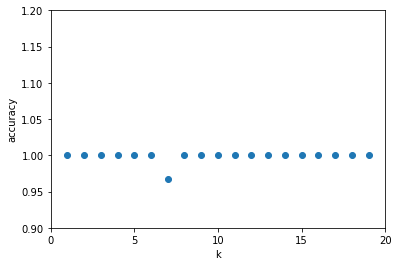

In [280]:
# acierto considerando el modelo entero
k_range = range(1, 20)
scores = {}
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    scores[k] = model.score(X_test, y_test)  
    print(scores[k])

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])
plt.ylim(0.90,1.2)
plt.show()

In [281]:
# Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.60, random_state=42)

In [298]:
print(knn_check(3, [15.7,2.8,9.5,0.1]))
print(knn_check(3, [1.7,3.8,4.5,11.3]))
print(knn_check(7, [15.7,2.8,9.5,0.1]))
print(knn_check(7, [1.7,3.8,4.5,11.3]))

[2]
[2]
[2]
[2]


In [299]:
# k=3, predicción con test group para ver si es adecuada
accuracy_check(3)           

0.9555555555555556

In [300]:
# k=3 y prediccion con todos los datos
test60_k3 = accuracy_check(3)  
test60_k3

0.9555555555555556

In [301]:
# k=7         
test60_k7 = accuracy_check(7)  
test60_k7

0.9666666666666667

In [302]:
print(f"Grupo test con el 20% de los datos y k=3: {test20_k3}\nGrupo test con el 60% de los datos y k=3: {test60_k3}\n")

print(f"Grupo test con el 20% de los datos y k=7: {test20_k7}\nGrupo test con el 60% de los datos y k=7: {test60_k7}")

Grupo test con el 20% de los datos y k=3: 1.0
Grupo test con el 60% de los datos y k=3: 0.9555555555555556

Grupo test con el 20% de los datos y k=7: 0.9666666666666667
Grupo test con el 60% de los datos y k=7: 0.9666666666666667


In [ ]:
# El modelo es un poco menos preciso si cogemos un 60% de los datos para test mientras que k=3

In [288]:
# Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [289]:
df = plants[plants["variety"] != "Setosa"]
df

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [290]:
X1 = df.iloc[:,:4]
y1 = df["variety"]

In [291]:
variety = preprocessing.LabelEncoder()
encoded1 = variety.fit_transform(y1)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X1, encoded1, test_size=0.60, random_state=42)

In [293]:
#k=3
test60_k3_s = accuracy_check(3)  
test60_k3_s

0.9333333333333333

In [294]:
#k=7
test60_k7_s = accuracy_check(7)  
test60_k7_s

0.95

In [295]:
print(f"Grupo test con el 20% de los datos y k=3: {test20_k3}\nGrupo test con el 60% de los datos y k=3: {test60_k3}\nGrupo test: 60%, k=3 sin Setosa:{test60_k3_s}\n")

print(f"Grupo test con el 20% de los datos y k=7: {test20_k7}\nGrupo test con el 60% de los datos y k=7: {test60_k7}\nGrupo test: 60%, k=7 sin Setosa:{test60_k7_s}")

# Los resultados han empeorado un poco eliminando el grupo Setosa

Grupo test con el 20% de los datos y k=3: 1.0
Grupo test con el 60% de los datos y k=3: 0.9555555555555556
Grupo test: 60%, k=3 sin Setosa:0.9333333333333333

Grupo test con el 20% de los datos y k=7: 0.9666666666666667
Grupo test con el 60% de los datos y k=7: 0.9666666666666667
Grupo test: 60%, k=7 sin Setosa:0.95


In [296]:
# sin setosa
X_train, X_test, y_train, y_test = train_test_split(X1, encoded1, test_size=0.20, random_state=42)
k_range = range(1, 20)
scores = {}
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X1, y1)
    scores[k] = model.score(X1, y1)   
    print(scores[k])

1.0
0.97
0.94
0.94
0.95
0.96
0.96
0.97
0.97
0.97
0.96
0.97
0.97
0.97
0.98
0.98
0.97
0.96
0.97


In [131]:
# ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

# No, los aciertos han disminuido al eliminar una clase de flor cuando en teoría deberían haber aumentado porque el modelo tiene una menos variable que predecir.